<a href="https://colab.research.google.com/github/James-Arogo/Parrot/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x=np.array([0,np.pi/2, np.pi])
y=np.sin(x)
print(y)
z=np.cos(x)
print(z)
m=np.tan(x)
print(m)

[0.0000000e+00 1.0000000e+00 1.2246468e-16]
[ 1.000000e+00  6.123234e-17 -1.000000e+00]
[ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


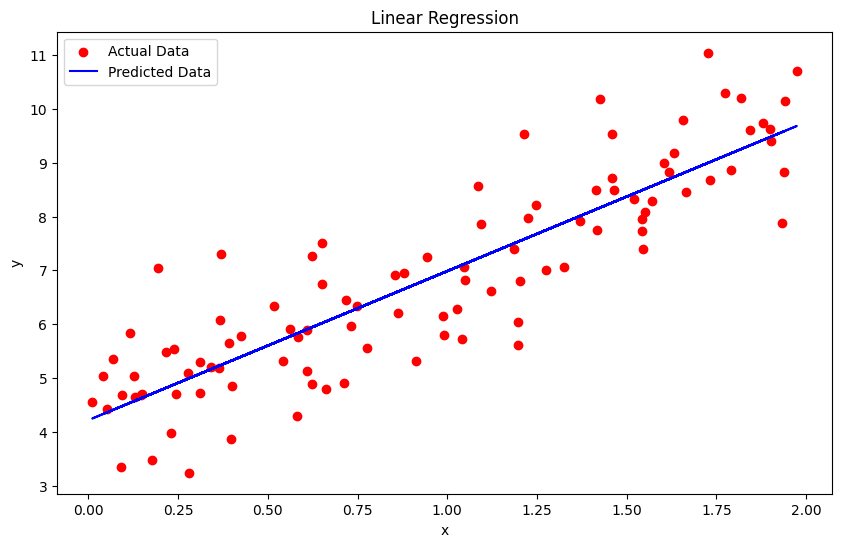

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x=2* np.random.rand(100,1)
y=4+3*x +np.random.randn(100,1)
plt.figure(figsize=(10,6))
plt.scatter(x,y,color="red",label='Actual Data')
x_b=np.c_[np.ones((100,1)),x]
theta_best=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
y_pred=x_b.dot(theta_best)
plt.plot(x,y_pred,color="blue", label='Predicted Data')
plt.title('Linear Regression')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    This function merges the OECD Better Life Index data and GDP per capita data
    to create a DataFrame with "GDP per capita" and "Life satisfaction" columns.
    """
    # Assuming 'oecd_bli' contains life satisfaction data and 'gdp_per_capita' contains GDP data
    # You'll need to adjust the column names according to your actual data

    # Example: Assuming 'Life satisfaction' is in column 'satisfaction' of 'oecd_bli'
    # and 'GDP per capita' is in column 'gdp' of 'gdp_per_capita'
    # Replace with the actual column names from your datasets
    oecd_bli = oecd_bli.rename(columns={oecd_bli.columns[0]: "Life satisfaction"})
    gdp_per_capita = gdp_per_capita.rename(columns={gdp_per_capita.columns[0]: "GDP per capita"})

    # Convert 'GDP per capita' column to numeric, handling commas and errors
    gdp_per_capita["GDP per capita"] = pd.to_numeric(gdp_per_capita["GDP per capita"].str.replace(',', ''), errors='coerce')
    oecd_bli["Life satisfaction"] = pd.to_numeric(oecd_bli["Life satisfaction"].str.replace(',', ''), errors='coerce')


    country_stats = pd.merge(oecd_bli[["Life satisfaction"]], gdp_per_capita[["GDP per capita"]], left_index=True, right_index=True)
    return country_stats

# Load the data
oecd_bli = pd.read_csv("/content/sample_data/mnist_test.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/sample_data/mnist_test.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]
plt.show()

ValueError: could not convert string to float: '2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,116,125,171,255,255,150,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,253,253,253,218,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,169,253,253,253,213,142,176,253,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,250,253,210,32,12,0,6,206,253,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,251,210,25,0,0,0,122,248,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,31,18,0,0,0,0,209,253,253,65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,117,247,253,198,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,76,247,253,231,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,253,253,144,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176,246,253,159,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,234,253,233,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198,253,253,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,248,253,189,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,200,253,253,141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,134,253,253,173,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,248,253,253,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,248,253,253,43,20,20,20,20,5,0,5,20,20,37,150,150,150,147,10,0,0,0,0,0,0,0,0,0,248,253,253,253,253,253,253,253,168,143,166,253,253,253,253,253,253,253,123,0,0,0,0,0,0,0,0,0,174,253,253,253,253,253,253,253,253,253,253,253,249,247,247,169,117,117,57,0,0,0,0,0,0,0,0,0,0,118,123,123,123,166,253,253,253,155,123,123,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0'

Error in callback <function _draw_all_if_interactive at 0x7bafad15d440> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    """
    This function merges the OECD Better Life Index data and GDP per capita data
    to create a DataFrame with "GDP per capita" and "Life satisfaction" columns.
    """
    # Assuming 'oecd_bli' contains life satisfaction data and 'gdp_per_capita' contains GDP data
    # You'll need to adjust the column names according to your actual data

    # Example: Assuming 'Life satisfaction' is in column 'satisfaction' of 'oecd_bli'
    # and 'GDP per capita' is in column 'gdp' of 'gdp_per_capita'
    # Replace with the actual column names from your datasets
    oecd_bli = oecd_bli.rename(columns={oecd_bli.columns[0]: "Life satisfaction"})
    gdp_per_capita = gdp_per_capita.rename(columns={gdp_per_capita.columns[0]: "GDP per capita"})

    # Convert 'GDP per capita' column to numeric, handling commas and errors
    gdp_per_capita["GDP per capita"] = pd.to_numeric(gdp_per_capita["GDP per capita"].str.replace(',', ''), errors='coerce')
    oecd_bli["Life satisfaction"] = pd.to_numeric(oecd_bli["Life satisfaction"].str.replace(',', ''), errors='coerce')


    country_stats = pd.merge(oecd_bli[["Life satisfaction"]], gdp_per_capita[["GDP per capita"]], left_index=True, right_index=True)
    return country_stats

# Load the data
oecd_bli = pd.read_csv("/content/sample_data/mnist_test.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/sample_data/mnist_test.csv",thousands=',',delimiter='\t',
encoding='latin1', na_values="n/a")
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]
# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')

# Select a linear model
model = sklearn.linear_model.LinearRegression()
# Train the model
model.fit(X, y)
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
a=np.array([[2,4],[6,7]])
b=np.array([[6,7],[1,8]])
d=np.dot(a,b)
print(d)